In [1]:
import sys
sys.path.append("../")

In [7]:
from __future__ import division
from pymacrospin import *
from pymacrospin import crystal, demag, energy, normalize
import numpy as np
import pandas as pd

from mpl_toolkits.mplot3d import Axes3D, proj3d  
import matplotlib.pyplot as plt
from matplotlib import rcParams

rcParams['font.size'] = 16

# Cubic anisotropy #
Author: Colin Jermain

Following the [Crystal orientation](Crystal orientation.ipynb) discussion, the cubic anisotropy can be defined in the context of a given crystal surface. This notebook will illustrate the free energy of the cubic anisotropy in the $(110)$ surface of the yttrium iron garnet (YIG) material. The magnetic parameters for YIG are given in the [Yttrium iron garnet](Yttrium iron garnet.ipynb) notebook.

The origins of cubic anisotropy are in spin-orbit coupling [(O'Handley, 2000)](http://www.wiley.com/WileyCDA/WileyTitle/productCd-0471155667.html).

## Free energy description ##

The cubic anisotropy contributes to the free energy in terms of the square of the magnetization. This can be explained by time-reversal symmetry, under which the direction of magnetization ($\vec{M} = \vec{r} \times \vec{J}$) is expected to reverse [(Landau et al., 1960)](https://www.elsevier.com/books/electrodynamics-of-continuous-media/landau/978-0-7506-2634-7). The free energy should not reverse sign since this would make stable equilibriums into unstable energy maxima. The first two terms of the anisotropy part of the free energy take the form

$$F_c = \frac{K_{c1}}{M_s^4}(M_l^2 M_m^2 + M_m^2 M_n^2 + M_l^2 M_n^2) + \frac{K_{c2}}{M_s^6}(M_l^2 M_m^2 M_n^2)$$

in terms of the magnetization along the Miller indices $[lmn]$ of the crystal, saturation magnetization ($M_s$), and the first and second order energy coefficients ($K_{c1}$ and $K_{c2}$).


In [8]:
l,m,n = crystal.l, crystal.m, crystal.n

z = normalize(np.array([1,1,0]))
x = normalize(np.array([1,-1,1]))
y = np.cross(z, x)

T = np.concatenate((x, y, z)).reshape(3,3)

in_plane_indices = crystal.in_plane_indices(z, magnitude=1)
in_plane_normals = normalize(in_plane_indices)
in_plane_angles = crystal.angle_between_directions(x, z,
                            in_plane_normals, rotation='right')

# Sort the angles and corresponding indices
sorting_mask = in_plane_angles.argsort()
in_plane_angles = in_plane_angles[sorting_mask]
in_plane_indices = in_plane_indices[sorting_mask]
in_plane_normals = in_plane_normals[sorting_mask]
in_plane_labels = [crystal.miller_indices_display(i) for i in in_plane_indices]

angles = np.linspace(0, 360, num=100) # degrees
rotations = rotation_array(Rz, angles)
orientations = l.dot(rotations.dot(T))

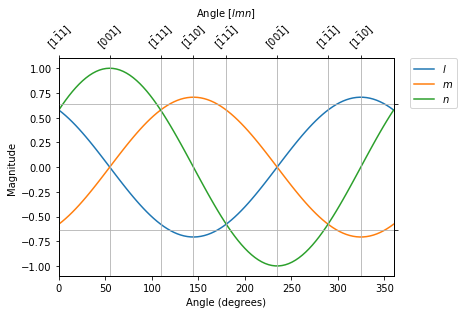

In [14]:
plt.plot(angles, orientations.dot(l), label='$l$')
plt.plot(angles, orientations.dot(m), label='$m$')
plt.plot(angles, orientations.dot(n), label='$n$')
plt.xlim(0,360)
plt.ylabel("Magnitude")
plt.xlabel("Angle (degrees)")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

plt.twiny()
plt.xlabel("Angle $[lmn]$")
plt.xticks(in_plane_angles, in_plane_labels, rotation=45, verticalalignment='bottom')
plt.grid(which='major')
plt.xlim(0, 360)
plt.twinx()
plt.yticks([-1/np.sqrt(3), 1/np.sqrt(3)], alpha=0.0)
plt.ylim(-1, 1)
plt.grid(which='major')
plt.show()